In [1]:
import matplotlib.pyplot as plt
from ase.optimize.sciopt import *               
from ase.utils.geometry import *
from ase.lattice.spacegroup import crystal
from ase.visualize import *
from ase.lattice.surface import surface
from ase import Atoms
from ase import io
from ase.io import *
from ase.io.cif import read_cif
from ase.io.vasp import write_vasp
from abtem.visualize import show_atoms
from ase.visualize.plot import plot_atoms
from ase.build import add_adsorbate

/home/ahlawat/.local/lib/python3.9/site-packages/ase/utils/geometry.py:8: UserWarning: Moved to ase.geometry and ase.build
  warnings.warn('Moved to ase.geometry and ase.build')
/home/ahlawat/.local/lib/python3.9/site-packages/ase/lattice/spacegroup.py:5: UserWarning: Moved to ase.spacegroup
  warnings.warn('Moved to ase.spacegroup')
/home/ahlawat/.local/lib/python3.9/site-packages/ase/lattice/surface.py:17: UserWarning: Moved to ase.build
  warnings.warn('Moved to ase.build')


In [2]:
! rm *.vasp

rm: cannot remove '*.vasp': No such file or directory


## cubic 3C polymorph: http://dx.doi.org/10.1016/j.jpcs.2008.05.007
- Experimental data
   - ICSD 161481
   - ICSD Structure : Cs I3 Pb
   - Space Group: P m 3 m (221)
   - Cell: a 6.2894Å b 6.2894Å c 6.2894Å, α 90° β 90° γ 90° 

/home/ahlawat/.local/lib/python3.9/site-packages/ase/io/cif.py:401: UserWarning: crystal system 'cubic' is not interpreted for space group Spacegroup(221, setting=1). This may result in wrong setting!
  warnings.warn(


Text(0, 0.5, 'y[$\\AA$]')

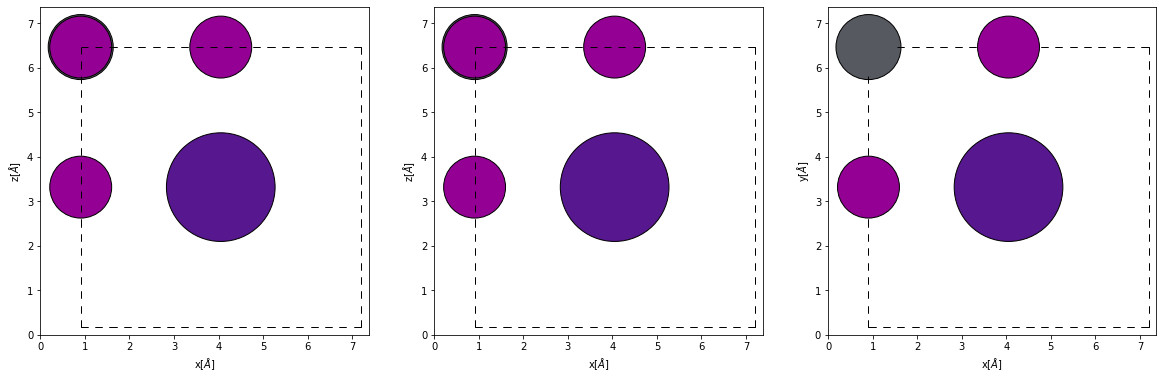

In [3]:
structure = io.read('cubic.cif')
structure = sort(structure)

view(structure)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

plot_atoms(structure, ax1, radii=0.5, rotation=('90x,0y,0z'))
#ax1.set_xlim(-20, 30)
ax1.set_xlabel(r'x[$\AA$]')
ax1.set_ylabel(r'z[$\AA$]')

plot_atoms(structure, ax2, radii=0.5, rotation=('90x,0y,0z'))
#ax2.set_xlim(-20, 30)
ax2.set_xlabel(r'x[$\AA$]')
ax2.set_ylabel(r'z[$\AA$]')

plot_atoms(structure, ax3, radii=0.5, rotation=('180x,0y,0z'))
#ax3.set_xlim(-20, 30)
ax3.set_xlabel(r'x[$\AA$]')
ax3.set_ylabel(r'y[$\AA$]')

#fig.savefig("ase_slab.png")


### prepare vasp/quantum espresso input file

In [4]:
write_vasp('cubic_3C.vasp', structure, vasp5=True, direct=True)

# inp_data={'prefix':"cubic",
#           'electron_maxstep':1000,
#           'outdir':"./",    
#           'pseudo_dir':"/work/e89/e89/ahlawat/PP/",
#           'calculation':'vc-relax',
#           'vdw_corr':'grimme-d3',
#           'ecutwfc':80.,
#           'occupations':'fixed',
#           'ecutrho':560.,   
#           'conv_thr':1e-8,
#           'electron_maxstep':500,
#           'ion_dynamics':'bfgs',
#           'cell_dynamics':'bfgs'}

# pseudos={"C":"C.pbe-n-rrkjus_psl.1.0.0.UPF", 
#          "H":"H.pbe-rrkjus_psl.1.0.0.UPF", 
#          "I":"I.pbe-n-rrkjus_psl.0.2.UPF", 
#          "N":"N.pbe-n-rrkjus_psl.1.0.0.UPF",
#          "Pb":"Pb.pbe-dn-rrkjus_psl.0.2.2.UPF"}

# io.write("Sn_cubic.pwi", 
#          new_slab, 
#          input_data=inp_data,
#          pseudopotentials=pseudos, 
#          kpts=(1, 2, 3),
#          koffset=(0, 0, 0), 
#          crystal_coordinates=False)


## tetragonal polymorph:  https://dx.doi.org/10.25505/fiz.icsd.cc20vqj4
- Experimental data
  - Space Group: P 4/m b m (127)
  - Cell: a 8.82690(3)Å b 8.82690(3)Å c 6.29902(3)Å, α 90° β 90° γ 90° 

/home/ahlawat/.local/lib/python3.9/site-packages/ase/io/cif.py:401: UserWarning: crystal system 'tetragonal' is not interpreted for space group Spacegroup(127, setting=1). This may result in wrong setting!
  warnings.warn(


Text(0, 0.5, 'y[$\\AA$]')

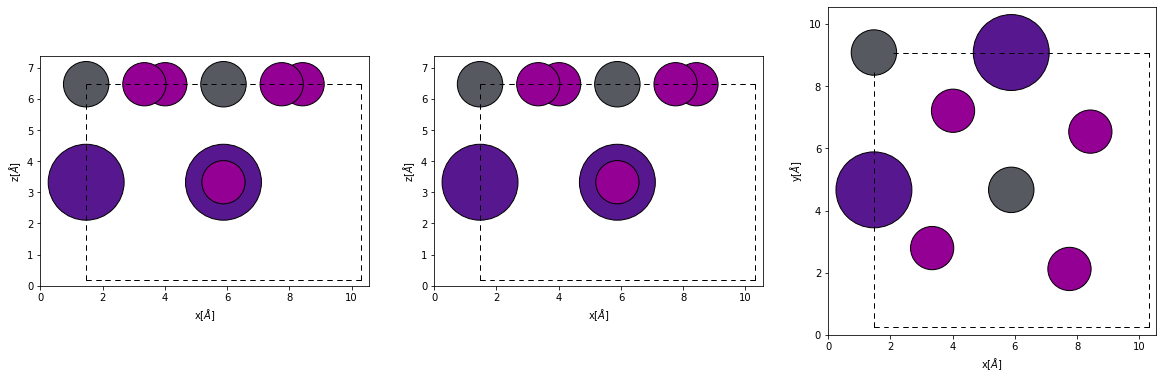

In [5]:
structure = io.read('beta.cif')
structure = sort(structure)

view(structure)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

plot_atoms(structure, ax1, radii=0.5, rotation=('90x,0y,0z'))
#ax1.set_xlim(-20, 30)
ax1.set_xlabel(r'x[$\AA$]')
ax1.set_ylabel(r'z[$\AA$]')

plot_atoms(structure, ax2, radii=0.5, rotation=('90x,0y,0z'))
#ax2.set_xlim(-20, 30)
ax2.set_xlabel(r'x[$\AA$]')
ax2.set_ylabel(r'z[$\AA$]')

plot_atoms(structure, ax3, radii=0.5, rotation=('180x,0y,0z'))
#ax3.set_xlim(-20, 30)
ax3.set_xlabel(r'x[$\AA$]')
ax3.set_ylabel(r'y[$\AA$]')

#fig.savefig("ase_slab.png")


### prepare vasp/quantum espresso input file

In [6]:
write_vasp('tetragonal.vasp', structure, vasp5=True, direct=True)

# inp_data={'prefix':"cubic",
#           'electron_maxstep':1000,
#           'outdir':"./",    
#           'pseudo_dir':"/work/e89/e89/ahlawat/PP/",
#           'calculation':'vc-relax',
#           'vdw_corr':'grimme-d3',
#           'ecutwfc':80.,
#           'occupations':'fixed',
#           'ecutrho':560.,   
#           'conv_thr':1e-8,
#           'electron_maxstep':500,
#           'ion_dynamics':'bfgs',
#           'cell_dynamics':'bfgs'}

# pseudos={"C":"C.pbe-n-rrkjus_psl.1.0.0.UPF", 
#          "H":"H.pbe-rrkjus_psl.1.0.0.UPF", 
#          "I":"I.pbe-n-rrkjus_psl.0.2.UPF", 
#          "N":"N.pbe-n-rrkjus_psl.1.0.0.UPF",
#          "Pb":"Pb.pbe-dn-rrkjus_psl.0.2.2.UPF"}

# io.write("Sn_cubic.pwi", 
#          new_slab, 
#          input_data=inp_data,
#          pseudopotentials=pseudos, 
#          kpts=(1, 2, 3),
#          koffset=(0, 0, 0), 
#          crystal_coordinates=False)

## orthorhombic polymorph: http://dx.doi.org/10.1021/acsenergylett.8b00672
- Experimental data
  - ICSD 264725 
  - ICSD Structure : (Cs I3 Pb)n
  - Space Group: P n a m (62)
  - Cell: a 8.8561(4)Å b 8.5766(3)Å c 12.4722(6)Å, α 90° β 90° γ 90° 

Text(0, 0.5, 'y[$\\AA$]')

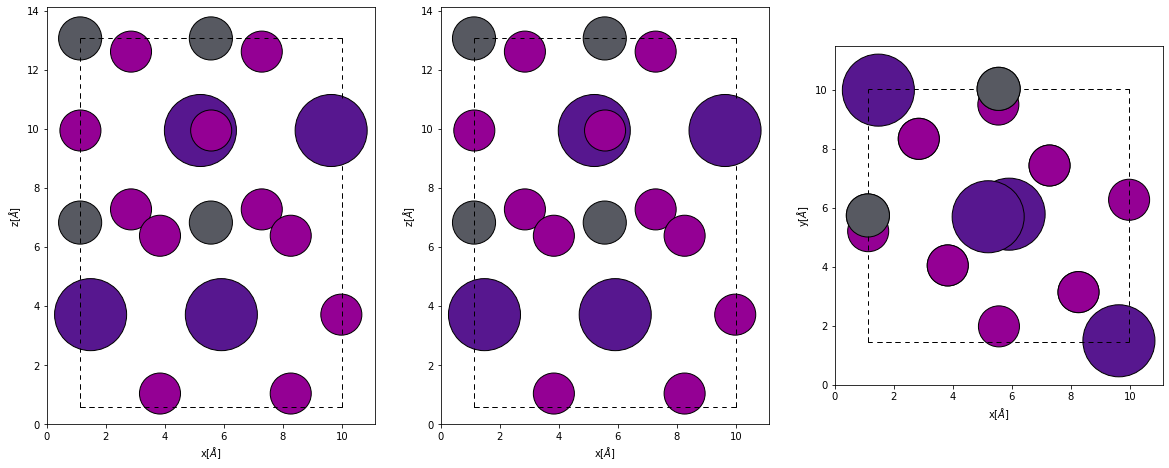

In [7]:
structure = io.read('ortho.cif')
structure = sort(structure)

view(structure)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

plot_atoms(structure, ax1, radii=0.5, rotation=('90x,0y,0z'))
#ax1.set_xlim(-20, 30)
ax1.set_xlabel(r'x[$\AA$]')
ax1.set_ylabel(r'z[$\AA$]')

plot_atoms(structure, ax2, radii=0.5, rotation=('90x,0y,0z'))
#ax2.set_xlim(-20, 30)
ax2.set_xlabel(r'x[$\AA$]')
ax2.set_ylabel(r'z[$\AA$]')

plot_atoms(structure, ax3, radii=0.5, rotation=('180x,0y,0z'))
#ax3.set_xlim(-20, 30)
ax3.set_xlabel(r'x[$\AA$]')
ax3.set_ylabel(r'y[$\AA$]')

#fig.savefig("ase_slab.png")


### prepare vasp/quantum espresso input file

In [8]:
write_vasp('ortho.vasp', structure, vasp5=True, direct=True)

# inp_data={'prefix':"cubic",
#           'electron_maxstep':1000,
#           'outdir':"./",    
#           'pseudo_dir':"/work/e89/e89/ahlawat/PP/",
#           'calculation':'vc-relax',
#           'vdw_corr':'grimme-d3',
#           'ecutwfc':80.,
#           'occupations':'fixed',
#           'ecutrho':560.,   
#           'conv_thr':1e-8,
#           'electron_maxstep':500,
#           'ion_dynamics':'bfgs',
#           'cell_dynamics':'bfgs'}

# pseudos={"C":"C.pbe-n-rrkjus_psl.1.0.0.UPF", 
#          "H":"H.pbe-rrkjus_psl.1.0.0.UPF", 
#          "I":"I.pbe-n-rrkjus_psl.0.2.UPF", 
#          "N":"N.pbe-n-rrkjus_psl.1.0.0.UPF",
#          "Pb":"Pb.pbe-dn-rrkjus_psl.0.2.2.UPF"}

# io.write("Sn_cubic.pwi", 
#          new_slab, 
#          input_data=inp_data,
#          pseudopotentials=pseudos, 
#          kpts=(1, 2, 3),
#          koffset=(0, 0, 0), 
#          crystal_coordinates=False)

## hexagonal polymorph: https://dx.doi.org/10.5517/cc11hdmk
- Experimental data
  - Crystal details
  - Space group 	P n m a (62)
  - Unit cell 	a 10.4342(7)Å b 4.7905(3)Å c 17.7610(10)Å
  - α 90.00° β 90.00° γ 90.00°
  - Cell volume 	887.78
  - Reduced cell 	a 4.791Å b 10.434Å c 17.761Å
  - α 90.000° β 90.000° γ 90.000°
  - Polymorph 	delta polymorph
  - Colour 	yellow


/home/ahlawat/.local/lib/python3.9/site-packages/ase/io/cif.py:401: UserWarning: crystal system 'Orthorhombic' is not interpreted for space group Spacegroup(62, setting=1). This may result in wrong setting!
  warnings.warn(


Text(0, 0.5, 'y[$\\AA$]')

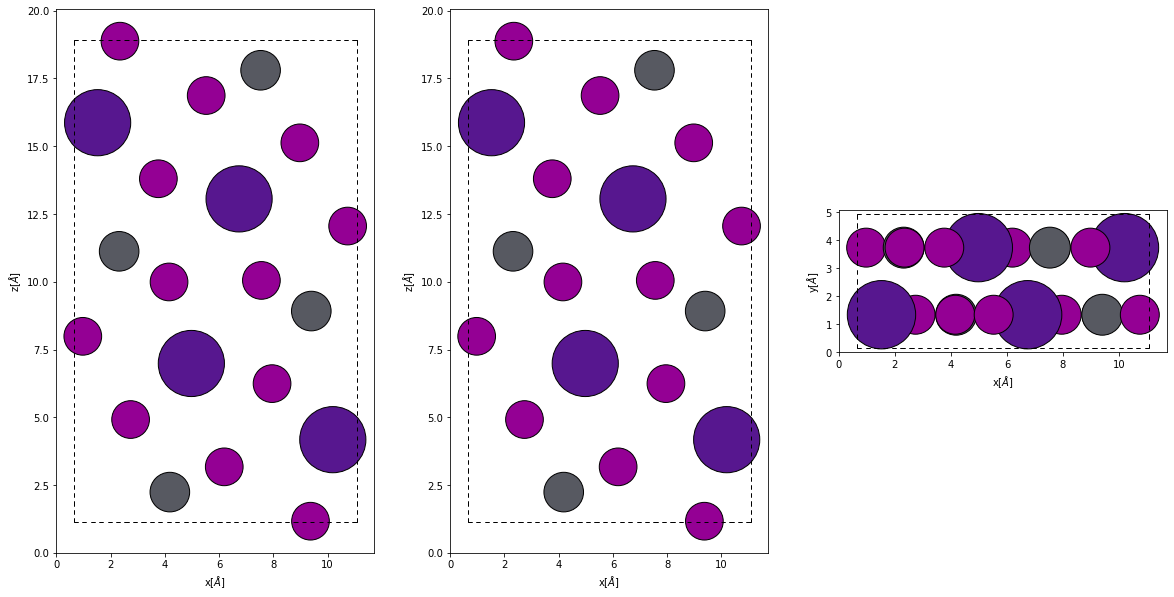

In [9]:
structure = io.read('delta.cif')
structure = sort(structure)

view(structure)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

plot_atoms(structure, ax1, radii=0.5, rotation=('90x,0y,0z'))
#ax1.set_xlim(-20, 30)
ax1.set_xlabel(r'x[$\AA$]')
ax1.set_ylabel(r'z[$\AA$]')

plot_atoms(structure, ax2, radii=0.5, rotation=('90x,0y,0z'))
#ax2.set_xlim(-20, 30)
ax2.set_xlabel(r'x[$\AA$]')
ax2.set_ylabel(r'z[$\AA$]')

plot_atoms(structure, ax3, radii=0.5, rotation=('180x,0y,0z'))
#ax3.set_xlim(-20, 30)
ax3.set_xlabel(r'x[$\AA$]')
ax3.set_ylabel(r'y[$\AA$]')

#fig.savefig("ase_slab.png")

### prepare vasp/quantum espresso input file

In [10]:
write_vasp('delta.vasp', structure, vasp5=True, direct=True)

# inp_data={'prefix':"cubic",
#           'electron_maxstep':1000,
#           'outdir':"./",    
#           'pseudo_dir':"/work/e89/e89/ahlawat/PP/",
#           'calculation':'vc-relax',
#           'vdw_corr':'grimme-d3',
#           'ecutwfc':80.,
#           'occupations':'fixed',
#           'ecutrho':560.,   
#           'conv_thr':1e-8,
#           'electron_maxstep':500,
#           'ion_dynamics':'bfgs',
#           'cell_dynamics':'bfgs'}

# pseudos={"C":"C.pbe-n-rrkjus_psl.1.0.0.UPF", 
#          "H":"H.pbe-rrkjus_psl.1.0.0.UPF", 
#          "I":"I.pbe-n-rrkjus_psl.0.2.UPF", 
#          "N":"N.pbe-n-rrkjus_psl.1.0.0.UPF",
#          "Pb":"Pb.pbe-dn-rrkjus_psl.0.2.2.UPF"}

# io.write("Sn_cubic.pwi", 
#          new_slab, 
#          input_data=inp_data,
#          pseudopotentials=pseudos, 
#          kpts=(1, 2, 3),
#          koffset=(0, 0, 0), 
#          crystal_coordinates=False)

# make a 3C cubic perovskite structure

In [11]:
from math import sqrt
from ase import Atoms
a = 6.2894
str_3C = Atoms('CsI3Pb',
              scaled_positions=[(0.5, 0.5, 0.5),
                                (0.0, 0.0, 0.5),
                                (0.0, 0.5, 0.0),
                                (0.5, 0.0, 0.0),
                                (0.0, 0.0, 0.0)],
              cell=[a,a,a, 90, 90, 90],
              pbc=True)

view(str_3C)


NameError: name 'str_pero' is not defined

# make a hexagonal perovskite structure

In [ ]:
from ase import Atoms
str_hexa = Atoms('Pb2I6Cs2',
              scaled_positions=[(0.000000,      0.000000,      0.500000),  
                                (0.000000,      0.000000,      0.000000),    
                                (0.337958,      0.168935,      0.750001),     
                                (0.830978,      0.168935,      0.750001),     
                                (0.830952,      0.662018,      0.750001),     
                                (0.661929,      0.830953,      0.250000),     
                                (0.169025,      0.830953,      0.250000),     
                                (0.169002,      0.338004,      0.250000),     
                                (0.662948,      0.376972,      0.248039),     
                                (0.373838,      0.668663,      0.747563)],    
              cell=[8.6603, 8.6603, 7.9022, 90, 90, 120],
              pbc=True)

str_pero1 = str_hexa.repeat((4,4,4))
view(str_hexa)


# make a 3R structure

In [ ]:
from ase import Atoms

str_3R = Atoms('Cs3I9Pb3',
              scaled_positions=[( 0.3285414654444574,  0.7036741641245904,  0.634863712892631),
                                ( 0.6619414654444575,  0.3702741641245903,  0.363673712892631),
                                (-0.0047585345555424,  0.0369741641245904,  0.031731712892631),
                                ( 0.1661999999999998,  0.8337999999999998,  0.337570000000000),
                                ( 0.1662000000000001,  0.3324000000000000,  0.337570000000000),
                                ( 0.6675999999999999,  0.8338000000000000,  0.337570000000000),
                                ( 0.8330300000000000,  0.1669700000000000,  0.671070000000000),
                                ( 0.8330299999999999,  0.6660600000000001,  0.671070000000000),
                                ( 0.3339399999999999,  0.1669699999999999,  0.671070000000000),
                                ( 0.4995600000000000,  0.5004400000000000,  0.004470000000000),
                                ( 0.4995600000000000,  0.9991200000000000,  0.004470000000000),
                                ( 0.0008800000000000,  0.5004400000000000,  0.004470000000000),
                                ( 0.6667000000000001,  0.3333000000000000,  0.837860000000000),
                                ( 0.0000000000000000,  0.0000000000000000,  0.504540000000000),
                                ( 0.3332999999999999,  0.6667000000000000,  0.170920000000000)],    
              cell=[8.982, 8.982, 11.006, 90, 90, 120],
              pbc=True)
view(str_3R)
str_pero = str_3R.repeat((4,4,4))
view(str_pero)


#new = str_3R + str_hexa

#view(new)

In [ ]:
str_3R.set_cell(str_hexa.cell, scale_atoms=True)

zmin = str_3R.positions[:, 2].min()

zmax = str_hexa.positions[:, 2].max()

str_3R.positions += (0, 0, zmax-zmin+3.4)

new = str_3R + str_hexa
new.set_cell([8.982, 8.982, 18.5])

view(new)

str_pero = new.repeat((4,4,4))
view(str_pero)

write('try.pdb',str_pero,format='proteindatabank')

In [ ]:
from ase import Atoms

str_3R = Atoms('Cs3I9Pb3',
              scaled_positions=[( 0.3285414654444574,  0.7036741641245904,  0.634863712892631),
                                ( 0.6619414654444575,  0.3702741641245903,  0.363673712892631),
                                (-0.0047585345555424,  0.0369741641245904,  0.031731712892631),
                                ( 0.1661999999999998,  0.8337999999999998,  0.337570000000000),
                                ( 0.1662000000000001,  0.3324000000000000,  0.337570000000000),
                                ( 0.6675999999999999,  0.8338000000000000,  0.337570000000000),
                                ( 0.8330300000000000,  0.1669700000000000,  0.671070000000000),
                                ( 0.8330299999999999,  0.6660600000000001,  0.671070000000000),
                                ( 0.3339399999999999,  0.1669699999999999,  0.671070000000000),
                                ( 0.4995600000000000,  0.5004400000000000,  0.004470000000000),
                                ( 0.4995600000000000,  0.9991200000000000,  0.004470000000000),
                                ( 0.0008800000000000,  0.5004400000000000,  0.004470000000000),
                                ( 0.6667000000000001,  0.3333000000000000,  0.837860000000000),
                                ( 0.0000000000000000,  0.0000000000000000,  0.504540000000000),
                                ( 0.3332999999999999,  0.6667000000000000,  0.170920000000000)],    
              cell=[8.982, 8.982, 11.006, 90, 90, 120],
              pbc=True)

view(str_3R)
str_pero = str_3R.repeat((4,4,4))
view(str_pero)


# CsPbI3 structures are taken from:
- 